### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1]:
# Importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np

In [2]:
# Loading the data
(train_images, train_labels),  (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Obtaining the imges in grayscale
train_images_gray = tf.image.rgb_to_grayscale(train_images)
test_images_gray = tf.image.rgb_to_grayscale(test_images)

In [6]:
# Normalize grayscale images
train_images_gray_norm = train_images_gray / 255
test_images_gray_norm = test_images_gray / 255

In [3]:
# Normalize RGB images
train_images_norm = train_images / 255
test_images_norm = test_images / 255

In [7]:
# Shape of the data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
# Shape of the grayscale images
print(train_images_gray.shape)
print(test_images_gray.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [7]:
# Shape of the normalized RGB images
print(train_images_norm.shape)
print(test_images_norm.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Text(0.5, 1.0, 'Label: [9]')

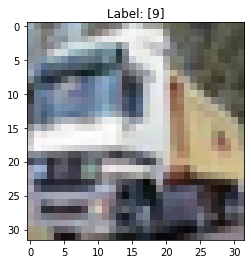

In [9]:
# Observing a sample
plt.imshow(train_images[1])
plt.title('Label: ' + str(train_labels[1]))

# Model 1

In [11]:
# Creating a model and layers
model1 = tf.keras.models.Sequential()
model1.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding='same'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
____________________________________________________

In [12]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model1.fit(train_images_gray, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 20s 11ms/step - loss: 5.7550 - accuracy: 0.1002
Epoch 2/25
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3029 - accuracy: 0.0968
Epoch 3/25
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3029 - accuracy: 0.0970
Epoch 4/25
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3028 - accuracy: 0.0995
Epoch 5/25
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3026 - accuracy: 0.1012
Epoch 6/25
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3024 - accuracy: 0.0997
Epoch 7/25
1563/1563 [==============================] - 16s 11ms/step - loss: 2.3028 - accuracy: 0.0952
Epoch 8/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.0985
Epoch 9/25
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3027 - accuracy: 0.0986
Epoch 10/25
1563/1563 [==============================] - 20s 13m

In [14]:
predictions1 = model1.predict(test_images_gray)

In [15]:
predictions1.shape

(10000, 10)

In [16]:
results1 = model1.evaluate(test_images_gray, test_labels)
print("test loss, test acc:", results1)

313/313 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1000
test loss, test acc: [2.3026206493377686, 0.10000000149011612]


# Model 2

In [20]:
# Creating a model and layers
model2 = tf.keras.models.Sequential()
model2.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [21]:
# Compiling the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model2.fit(train_images_gray, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 18s 11ms/step - loss: 3.1748 - accuracy: 0.1024
Epoch 2/25
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0998
Epoch 3/25
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 4/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3028 - accuracy: 0.1007
Epoch 5/25
1563/1563 [==============================] - 18s 12ms/step - loss: 2.3042 - accuracy: 0.0996
Epoch 6/25
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3029 - accuracy: 0.0955
Epoch 7/25
1563/1563 [==============================] - 15s 9ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 8/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.0975
Epoch 9/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.1006
Epoch 10/25
1563/1563 [==============================] - 17s 11ms

In [23]:
predictions2 = model2.predict(test_images_gray)

In [24]:
predictions2.shape

(10000, 10)

In [25]:
results2 = model2.evaluate(test_images_gray, test_labels)
print("test loss, test acc:", results2)

313/313 [==============================] - 2s 7ms/step - loss: 2.3026 - accuracy: 0.1000
test loss, test acc: [2.3026392459869385, 0.10000000149011612]


### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [26]:
# Creating a model and layers
model3 = tf.keras.models.Sequential()
model3.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model3.add(layers.Dropout(0.25))
model3.add(layers.Flatten())
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
__________________________________________________

In [27]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model3.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 27s 17ms/step - loss: 3.9076 - accuracy: 0.1013
Epoch 2/25
1563/1563 [==============================] - 23s 15ms/step - loss: 2.3029 - accuracy: 0.1010
Epoch 3/25
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3028 - accuracy: 0.0998
Epoch 4/25
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 5/25
1563/1563 [==============================] - 21s 14ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 6/25
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3027 - accuracy: 0.1003
Epoch 7/25
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0991
Epoch 8/25
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0992
Epoch 9/25
1563/1563 [==============================] - 23s 15ms/step - loss: 2.3027 - accuracy: 0.1016
Epoch 10/25
1563/1563 [==============================] - 22s 14m

In [29]:
predictions3 = model3.predict(test_images)

In [30]:
predictions3.shape

(10000, 10)

In [31]:
results3 = model3.evaluate(test_images, test_labels)
print("test loss, test acc:", results3)

313/313 [==============================] - 2s 5ms/step - loss: 2.3027 - accuracy: 0.1000
test loss, test acc: [2.302672863006592, 0.10000000149011612]


Model 1 on the grayscale images had an accuracy of 10%. Model 2 on the grayscale images also had an accuracy of 10%. Model 1 on the RGB images also had an accuracy of 10%. This shows that neither model is trained properly for either the grayscale images or the RGB images. Perhaps the model needs a lot more epochs than 25 for each model fitting, but I don't have the time right now :)

# Probar cositas para reducir error

## Model 1 with grayscale images normalized

In [17]:
# Creating a model and layers
model4 = tf.keras.models.Sequential()
model4.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding='same'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model4.add(layers.Dropout(0.25))
model4.add(layers.Flatten())
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
__________________________________________________

In [18]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model4.fit(train_images_gray_norm, train_labels, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 17s 10ms/step - loss: 2.0591 - accuracy: 0.2465
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6575 - accuracy: 0.4168
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5323 - accuracy: 0.4616
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4641 - accuracy: 0.4842
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3981 - accuracy: 0.5121
Epoch 6/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3562 - accuracy: 0.5279
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3217 - accuracy: 0.5371
Epoch 8/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2825 - accuracy: 0.5533
Epoch 9/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2727 - accuracy: 0.5539
Epoch 10/100
1563/1563 [==============================]

In [20]:
predictions4 = model4.predict(test_images_gray_norm)

In [21]:
predictions4.shape

(10000, 10)

In [22]:
results4 = model4.evaluate(test_images_gray_norm, test_labels)
print("test loss, test acc:", results4)

313/313 [==============================] - 2s 5ms/step - loss: 1.2597 - accuracy: 0.5866
test loss, test acc: [1.2596651315689087, 0.5866000056266785]


## Model 1 with color images normalized

In [9]:
# Creating a model and layers
model5 = tf.keras.models.Sequential()
model5.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding='same'))
model5.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model5.add(layers.Dropout(0.25))
model5.add(layers.Flatten())
model5.add(layers.Dense(32, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))
model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
__________________________________________________

In [10]:
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model5.fit(train_images_norm, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 14ms/step - loss: 1.8068 - accuracy: 0.3575
Epoch 2/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.4036 - accuracy: 0.5097
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2892 - accuracy: 0.5478
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2110 - accuracy: 0.5769
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1682 - accuracy: 0.5908
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1305 - accuracy: 0.6029
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1047 - accuracy: 0.6147
Epoch 8/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0739 - accuracy: 0.6250
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0366 - accuracy: 0.6358
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [12]:
predictions5 = model5.predict(test_images_norm)

In [13]:
predictions5.shape

(10000, 10)

In [14]:
results5 = model5.evaluate(test_images_norm, test_labels)
print("test loss, test acc:", results5)

313/313 [==============================] - 2s 5ms/step - loss: 1.1507 - accuracy: 0.6049
test loss, test acc: [1.1507055759429932, 0.6049000024795532]


Normalizando las imagenes en grises hemos mejorado mucho el accuracy del modelo, 58.66%, normalizando las imganes en RGB el modelo tiene un accuracy de 60.49%, lo que nos hace ver la importancia de normalizar nuestras imagenes para entrenar los modelos.